# **About Dataset**
"Unicorn" is a term used in the venture capital industry to describe a privately held startup company with a value of over $1 billion. The term was first popularized by venture capitalist Aileen Lee, founder of Cowboy Ventures, a seed-stage venture capital fund based in Palo Alto, California.

Unicorns can also refer to a recruitment phenomenon within the human resources (HR) sector. HR managers may have high expectations to fill a position, leading them to look for candidates with qualifications that are higher than required for a specific job. In essence, these managers are looking for a unicorn, which leads to a disconnect between their ideal candidate versus who they can hire from the pool of people available.

[Link for DataBase](https://www.kaggle.com/datasets/ramjasmaurya/unicorn-startups/data)

## Import for libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data exploration

In [2]:
#Loading data
Base_dados =  pd.read_csv('Unicornios.csv')
#Checking dimension
Base_dados.shape

(1186, 7)

In [3]:
#First records
Base_dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
#Columns
Base_dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Investors'],
      dtype='object')

In [5]:
#Renaming columns for pt-br 
Base_dados.rename( columns= {
    'Company' : 'Empresa', 
    'Valuation ($B)': 'Valor ($B)', 
    'Date Joined' : 'Data de Adesão', 
    'Country' : 'Pais', 
    'City' : 'Cidade',
    'Industry' : 'Setor', 
    'Investors' : 'Investidores'
}, inplace=True)
Base_dados.columns

Index(['Empresa', 'Valor ($B)', 'Data de Adesão', 'Pais', 'Cidade', 'Setor',
       'Investidores'],
      dtype='object')

In [6]:
#Checking the type of information
Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($B)      1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   Cidade          1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


I've noticed that some columns don't have the correct data types, such as “Join Date” and “Value”.

In [7]:
#Checking null values
Base_dados.isnull().sum()

Empresa            0
Valor ($B)         0
Data de Adesão     0
Pais               0
Cidade             0
Setor              0
Investidores      18
dtype: int64

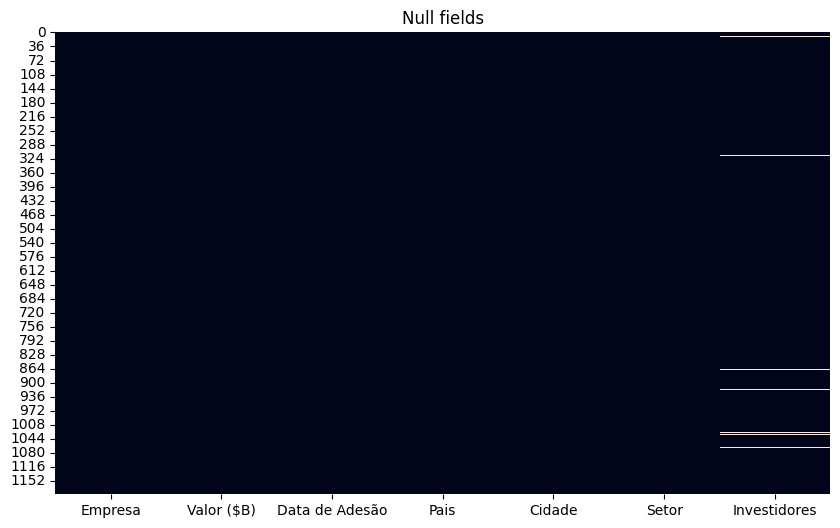

In [8]:
#Graph
plt.figure(figsize=(10,6))
plt.title('Null fields')
sns.heatmap(Base_dados.isnull(), cbar=False);

The visualization confirms that the base is mostly consistent and ready to extract relevant insights.

In [9]:
#Unique filds
Base_dados.nunique()

Empresa           1183
Valor ($B)         222
Data de Adesão     695
Pais                48
Cidade             286
Setor               34
Investidores      1152
dtype: int64

## Analysis

### Setor

In [10]:
#Checking Industry - Ranking
Base_dados['Setor'].value_counts()

Setor
Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Other                                                                  65
Supply chain, logistics, & delivery                                    65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail               

In [11]:
#Percentage view
round(Base_dados['Setor'].value_counts(normalize=True) * 100, 1)

Setor
Fintech                                                               20.2
Internet software & services                                          18.9
E-commerce & direct-to-consumer                                        8.7
Health                                                                 7.9
Artificial intelligence                                                6.2
Other                                                                  5.5
Supply chain, logistics, & delivery                                    5.5
Cybersecurity                                                          4.9
Data management & analytics                                            3.8
Auto & transportation                                                  3.4
Hardware                                                               3.2
Mobile & telecommunications                                            3.1
Edtech                                                                 2.7
Consumer & retail  

We can identify that half of the world's Unicorn companies are focused on technology

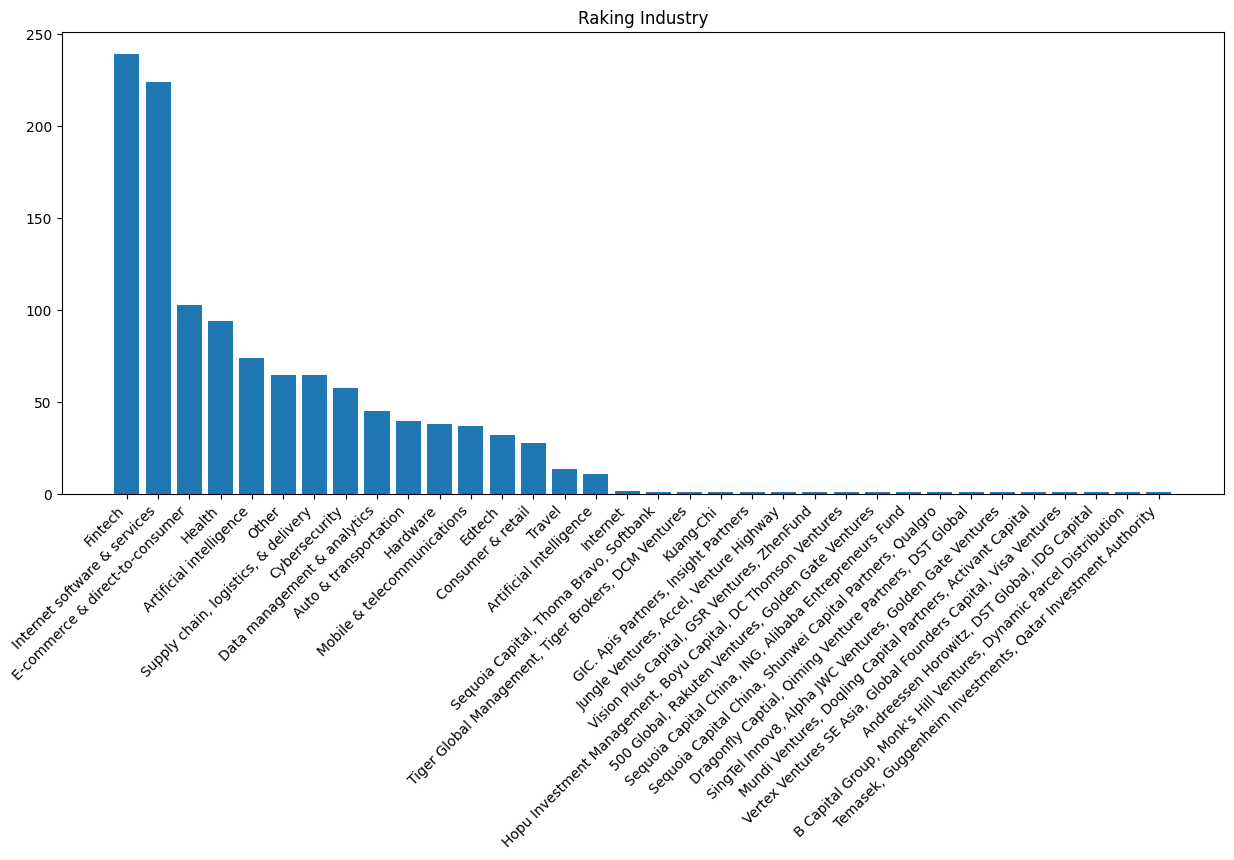

In [12]:
#Graph
plt.figure(figsize=(15,6))
plt.title('Raking Industry')
plt.bar(Base_dados['Setor'].value_counts().index, Base_dados['Setor'].value_counts())
plt.xticks(rotation=45, ha='right' );

Fintech: Tops the ranking, showing the market's huge focus on digital financial solutions.

Internet, software and services and E-commerce & direct-to-consumer: Also appear as dominant sectors, reflecting the global trend towards digitalization and direct consumption via online platforms.

### Pais

In [13]:
#Checking Coutry - Ranking
Base_dados['Pais'].value_counts()

Pais
United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Sweden                    8
Mexico                    8
Australia                 8
Netherlands               7
Indonesia                 7
Hong Kong                 7
Switzerland               6
Ireland                   6
Japan                     6
Norway                    5
Spain                     4
Finland                   4
Turkey                    3
United Arab Emirates      3
Belgium                   3
Colombia                  3
Estonia                   2
Chile                     2
Vietnam                   2
Austria                   2
Denmark                   2
South Africa              2
Thailand                  2
Lithuania                 2
Croatia        

In [14]:
#Percentage view
grafic_pizza = round(Base_dados['Pais'].value_counts(normalize=True) * 100, 1)
grafic_pizza

Pais
United States           53.6
China                   14.7
India                    5.9
United Kingdom           3.9
Germany                  2.4
France                   2.0
Israel                   1.9
Canada                   1.6
Brazil                   1.4
South Korea              1.4
Singapore                1.1
Sweden                   0.7
Mexico                   0.7
Australia                0.7
Netherlands              0.6
Indonesia                0.6
Hong Kong                0.6
Switzerland              0.5
Ireland                  0.5
Japan                    0.5
Norway                   0.4
Spain                    0.3
Finland                  0.3
Turkey                   0.3
United Arab Emirates     0.3
Belgium                  0.3
Colombia                 0.3
Estonia                  0.2
Chile                    0.2
Vietnam                  0.2
Austria                  0.2
Denmark                  0.2
South Africa             0.2
Thailand                 0.2
Lithuania

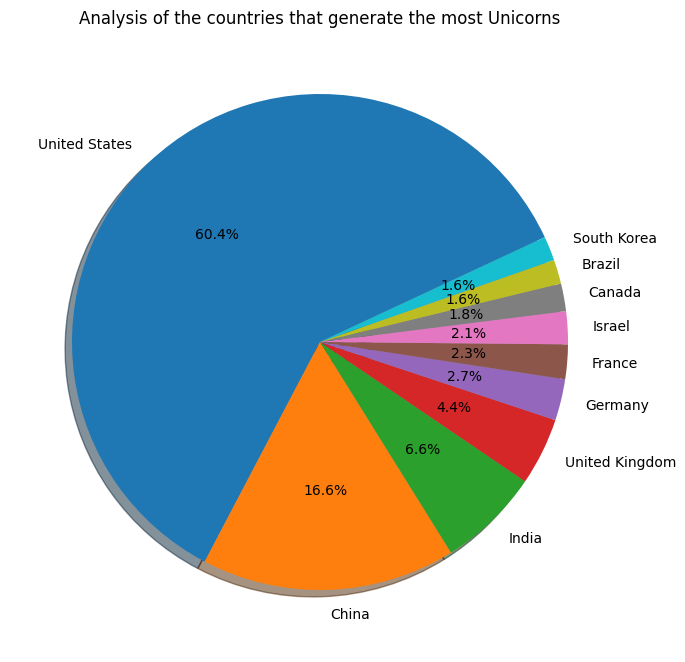

In [15]:
#Pie chart
plt.figure(figsize=(8,10))
plt.title('Analysis of the countries that generate the most Unicorns')
plt.pie(
    grafic_pizza.head(10),
    labels = grafic_pizza.index[0:10],
    shadow = True,
    startangle = 25,
    autopct = '%1.1f%%'
);

🇺🇸 United States (60.4%)
Leading the way, the US startup ecosystem accounts for more than half of all the world's unicorns.

This reflects a highly favorable environment for innovation, with great availability of capital, technological infrastructure and a consolidated entrepreneurial culture.

🇨🇳 China (16.6%)
In second place, China also demonstrates a strong capacity for generating billion-dollar startups, driven by its huge domestic market and policies to support technology.

🇮🇳 India (6.6%)
India comes third, confirming its accelerated growth in the technology and innovation sector, with fintechs and edtechs standing out.

### Data

In [16]:
#Converting date
Base_dados['Data de Adesão'] = pd.to_datetime( Base_dados['Data de Adesão'])
Base_dados['Data de Adesão'].head(10)

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
5   2019-05-02
6   2014-12-30
7   2019-02-05
8   2018-04-26
9   2018-10-26
Name: Data de Adesão, dtype: datetime64[ns]

In [17]:
#Extracting month and year
Base_dados['Mês'] = pd.DatetimeIndex(Base_dados['Data de Adesão']).month
Base_dados['Ano'] = pd.DatetimeIndex(Base_dados['Data de Adesão']).year
Base_dados.head()

,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores,Mês,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [18]:
#Creating a table for better visualization
Analise_Agrupada = Base_dados.groupby(by=['Pais', 'Empresa', 'Mês', 'Ano']).size().reset_index(name='Quatidade')
Analise_Agrupada

,Pais,Empresa,Mês,Ano,Quatidade
0,Argentina,Uala,8,2021,1
1,Australia,Airwallex,3,2019,1
2,Australia,Canva,1,2018,1
3,Australia,Culture Amp,7,2021,1
4,Australia,GO1,7,2021,1
...,...,...,...,...,...
1181,United States,o9 Solutions,4,2020,1
1182,United States,reddit,7,2017,1
1183,United States,thatgamecompany,3,2022,1
1184,Vietnam,MoMo,12,2021,1


In [19]:
#Country filter
Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'Brazil'
]

,Pais,Empresa,Mês,Ano,Quatidade
16,Brazil,C6 Bank,12,2020,1
17,Brazil,CargoX,10,2021,1
18,Brazil,CloudWalk,9,2021,1
19,Brazil,Creditas,12,2020,1
20,Brazil,Dock,5,2022,1
21,Brazil,EBANX,10,2019,1
22,Brazil,Loft,1,2020,1
23,Brazil,Loggi,6,2019,1
24,Brazil,MadeiraMadeira,1,2021,1
25,Brazil,Movile,7,2018,1


### Valor ($B)

In [20]:
#Converting ‘Value ($B)’ to a number and removing the ‘$’ symbol
Base_dados['Valor ($B)'] = pd.to_numeric(Base_dados['Valor ($B)'].apply(lambda Linha : Linha.replace('$', '')))
Base_dados.head()

,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores,Mês,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [21]:
#Creating a table for better visualization
Analise_Pais = Base_dados.groupby('Pais')['Valor ($B)'].sum().reset_index()
Analise_Pais.head()

,Pais,Valor ($B)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [22]:
#Sorting the values to ascending and storing them in a variable to be used in the graph
Analise_Valor = Analise_Pais.sort_values('Valor ($B)', ascending= False)
Analise_Valor.head(10)

,Pais,Valor ($B)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88
17,France,58.42
1,Australia,54.40
7,Canada,49.23
23,Israel,48.02
6,Brazil,40.08


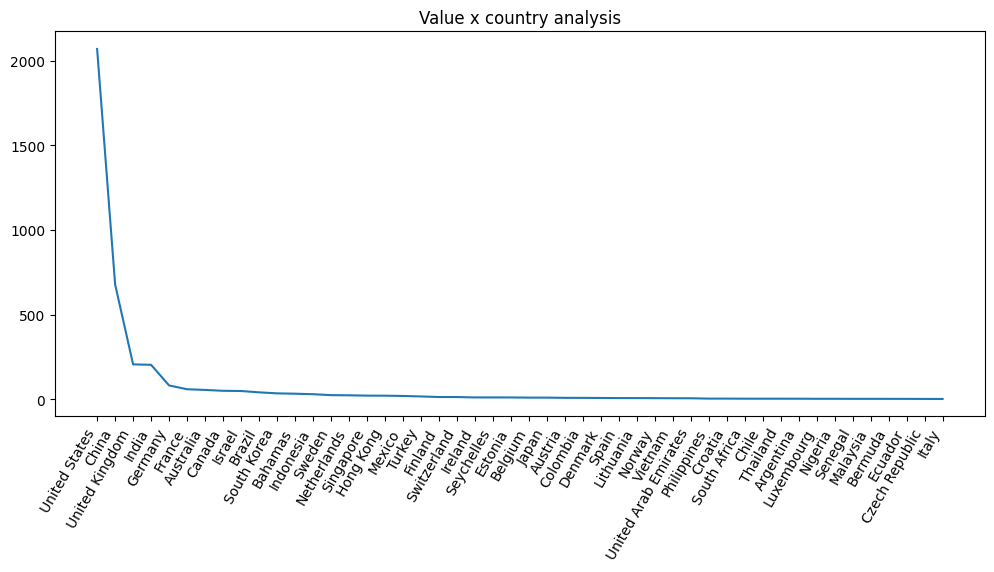

In [ ]:
#Graph
plt.figure(figsize=(12,5))
plt.plot(Analise_Valor['Pais'], Analise_Valor['Valor ($B)'])
plt.title('Value x country analysis')
plt.xticks(rotation=60, ha='right' );


The United States leads by far: the total value of its unicorns is extremely higher than that of the other countries, surpassing the US$ 2 trillion mark, which highlights its hegemony in innovation, venture capital and technological maturity.

China, even though it is in second place in terms of the number of unicorns, has a considerably lower value, highlighting the distance between the two ecosystems in terms of accumulated capital.

Countries like India, the UK and Germany follow with significant contributions, but still modest compared to the US.

The curve quickly flattens out, showing that the vast majority of countries concentrate low volumes of capital, even though they have unicorns in their territories.

_______________________________

## **Conclusion**
Analysis of the data on unicorn startups has revealed valuable information about the main sectors, regions and investors driving the global innovation ecosystem. Sectors such as **Fintech**, **Internet software & services**, **E-commerce** and **Artificial Intelligence** stand out as leaders in terms of the volume of billion-dollar startups, reflecting the growing focus on digital and scalable solutions.

During data exploration, it was necessary to treat columns with inappropriate types (such as dates and monetary values), highlighting the importance of data preparation to ensure a coherent analysis. In addition, visualizing the distributions showed that countries like the United States and China concentrate most of the unicorn companies, the result of more mature ecosystems and greater access to venture capital.

In contrast, although Brazil has a small number of unicorn startups, it stands out for being home to companies with extremely significant market values. This shows that the country, despite not leading in terms of numbers, has success stories that reflect a high potential for innovation and expansion. Examples such as C6 Bank, CargoX and CloundWalk illustrate how Brazil can generate globally competitive technological solutions, even in a more restricted investment environment.